In [4]:
# # Flood Prediction Using Machine Learning

# ## Overview

# This project aims to predict floods using machine learning algorithms. 
# By analyzing historical data on rainfall, river levels, and other factors, 
# our approach seeks to improve accuracy in flood forecasting and mitigate risks associated with natural disasters.

# ## Key Features

# - Real-time flood prediction based on updated data feeds.
# - Scalable system capable of handling large datasets.
# - Integration with geographic information systems (GIS) for visualization.

# ## Installation

# To install and run this project locally, follow these steps:

# 1. Clone the repository: `git clone https://github.com/your-username/flood-prediction.git`
# 2. Install dependencies: `pip install -r requirements.txt`
# 3. Set up configuration files as described in `config/README.md`

# ## Usage

# To use the flood prediction system:

# 1. Run `python main.py` to start the prediction engine.
# 2. Follow the prompts to input data and view predictions.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [6]:
data = pd.read_csv('kerala.csv')
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [7]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [8]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [9]:
data.isnull().astype(int).sum(axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [10]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [11]:
data['FLOODS']

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [12]:
# x = data.drop('ANNUAL RAINFALL',axis=1)
# y = data['FLOODS']
x = data.iloc[:,1:14]
y = data.iloc[:, -1]

In [13]:
x

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1


In [14]:
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

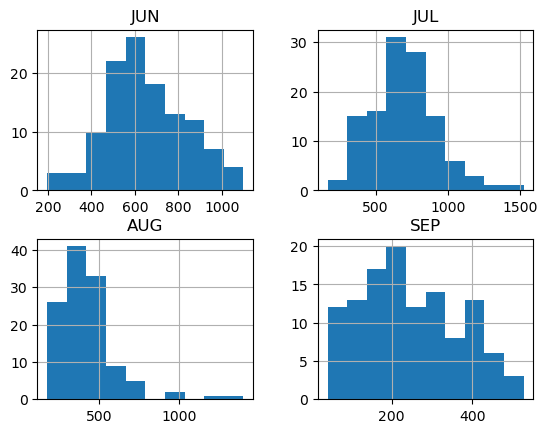

In [15]:
graph = data[['JUN','JUL','AUG','SEP']]
graph.hist()
plt.show()

In [16]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [17]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
svm_score=cross_val_score(SVC(),X=x,y=y,cv=3)
rf_score=cross_val_score(RandomForestClassifier(random_state=25),X=x,y=y,cv=3)
DTC_score=cross_val_score(DecisionTreeClassifier(),X=x,y=y,cv=3)
KNN_score=cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=3)
NBC_score=cross_val_score( GaussianNB(),X=x,y=y,cv=3)
grad_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=3)
ada_score=cross_val_score(AdaBoostClassifier(n_estimators=50,base_estimator=None,learning_rate=0.2,random_state=10),X=x,y=y,cv=5)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [19]:
print(log_score)
print(svm_score)
print(rf_score)
print(DTC_score)
print(KNN_score)
print(NBC_score)
print(grad_score)
print(ada_score)

[0.91666667 1.         0.95833333 0.95652174 0.95652174]
[0.925      0.92307692 0.94871795]
[0.6        0.84615385 0.53846154]
[0.6        0.74358974 0.51282051]
[0.95       0.87179487 0.84615385]
[0.525      0.71794872 0.56410256]
[0.55       0.84615385 0.56410256]
[0.5        0.83333333 0.83333333 0.86956522 0.86956522]


In [20]:
print(log_score.mean())
print(svm_score.mean())
print(rf_score.mean())
print(DTC_score.mean())
print(KNN_score.mean())
print(NBC_score.mean())
print(grad_score.mean())
print(ada_score.mean())

0.9576086956521739
0.9322649572649574
0.6615384615384615
0.6188034188034188
0.8893162393162393
0.6023504273504273
0.6534188034188034
0.7811594202898551


In [21]:
models=LogisticRegression()

In [22]:
models.fit(x_train,y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred=models.predict(x_test)

In [24]:
models.score(x_test,y_test)

0.9583333333333334

In [25]:
pt=pd.DataFrame({'true y':y_test,"predicted y":y_pred})
pt

,true y,predicted y
17,0,0
35,1,1
80,1,1
62,0,0
27,0,0
10,0,0
90,1,1
34,0,0
65,0,0
15,1,1


In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
y_pred=models.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[11  0]
 [ 1 12]]


Text(50.722222222222214, 0.5, 'predictions')

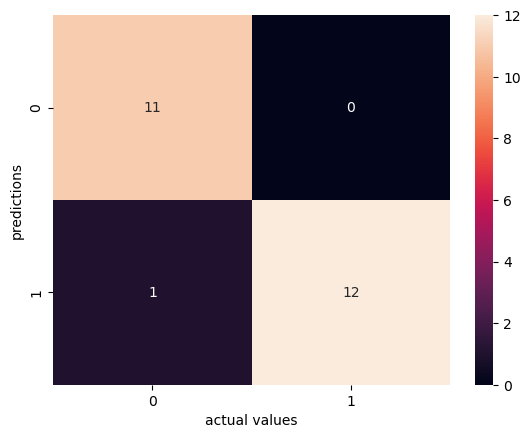

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predictions')

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



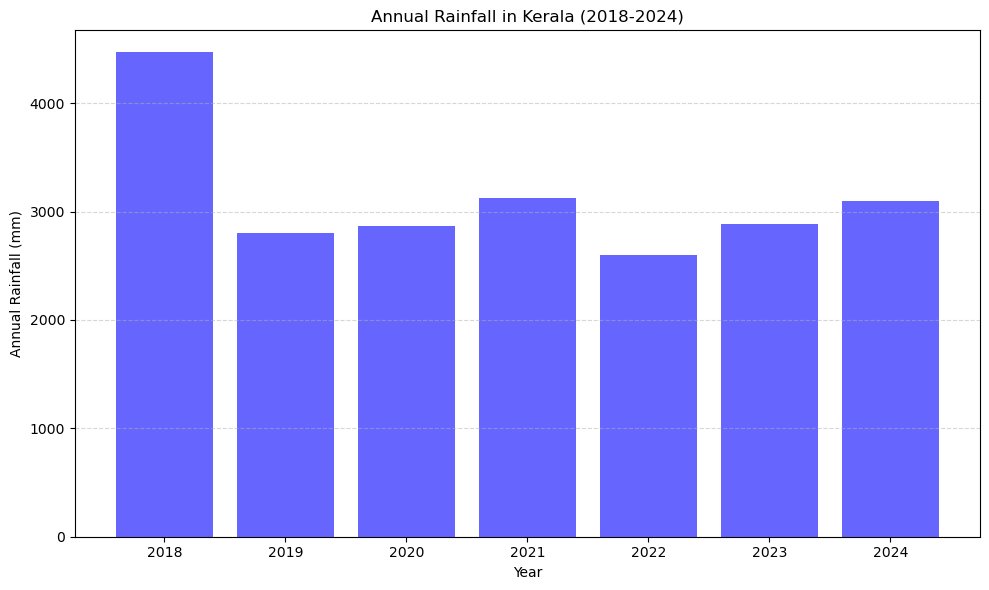

In [30]:
years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
annual_rainfall = [4473, 2800, 2864, 3122, 2600, 2890, 3100]
plt.figure(figsize=(10, 6))
plt.bar(years, annual_rainfall, color='blue', alpha=0.6)
plt.title('Annual Rainfall in Kerala (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.ylim(0, max(annual_rainfall) + 200)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

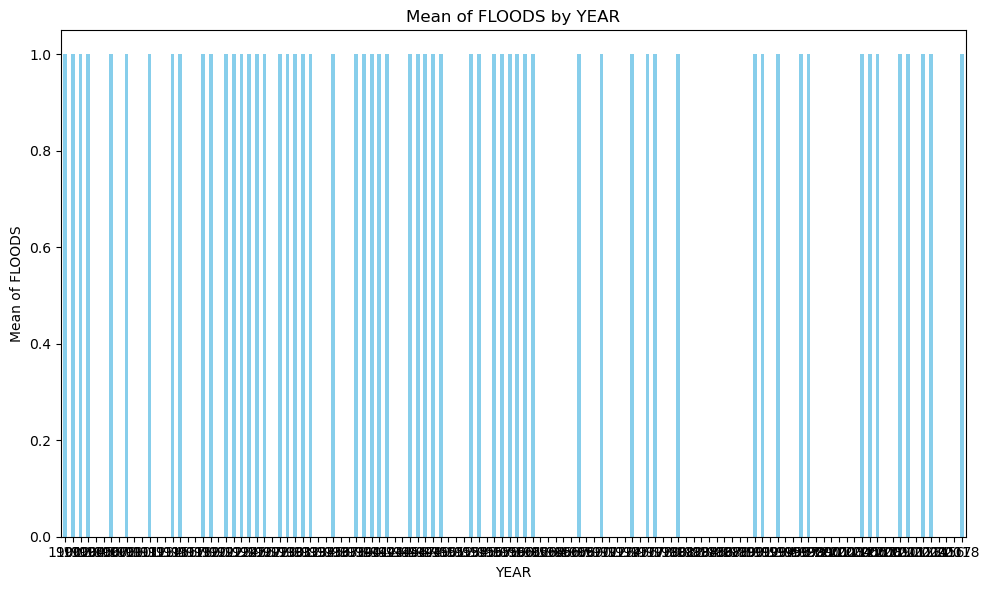

In [31]:
category_column = 'YEAR'
value_column = 'FLOODS'
grouped_data = data.groupby(category_column)[value_column].mean()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title(f'Mean of {value_column} by {category_column}')
plt.xlabel(category_column)
plt.ylabel(f'Mean of {value_column}')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0
